# Linear Regression: Impact of Promotional Budget on Sales

## Regression Model Results

### For every 1 million in radio promotional budget, there is a 95% chance to see in increase in sales between [7.79, 8.555] million dollars. These companies should continue to invest in radio promotions.

**Technical breakdown:**
<br>From the data provided, using this linear regression model: For every 1 million invested in radio promotions, sales are likely to increase by 8.1733 million dollars. The results are statistically significant with a p-value of 0.000, well below the significance level of 0.05 needed to confirm the accuracy of the model. The y (Sales) intercept is 41.5326, with a standard error of 4.067. The R-squared value is .757, meaning our X variable, Radio promotional budget accounts for 75.7% of the increase in sales. It might be worth exploring more data with more context, such as industry, and types of products and services. This could help us understand the remaining 24.3% influence on the Y variable, increase in Sales.

**Note:** This is a fictional dataset

## **Imports** 


Import relevant Python libraries and modules.

In [1]:
# Import standard Data Analysis libraries
import pandas as pd
import numpy as np
import datetime as dp
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import sem

In [2]:
#import data
df = pd.read_csv("marketing_sales_data.csv")

## **Data exploration** 


In [3]:
df.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


In [4]:
df.describe(include = 'all')

,TV,Radio,Social Media,Influencer,Sales
count,571,571.000000,572.000000,572,571.000000
unique,3,NaN,NaN,4,NaN
top,Low,NaN,NaN,Mega,NaN
freq,197,NaN,NaN,148,NaN
mean,NaN,18.646472,3.248471,NaN,193.516937
std,NaN,9.650740,2.195696,NaN,90.516153
min,NaN,0.194576,0.013230,NaN,31.199409
25%,NaN,10.878554,1.447163,NaN,118.544562
50%,NaN,18.810430,2.945318,NaN,198.521410
75%,NaN,25.838296,4.791290,NaN,268.567987


In [5]:
df.shape

(572, 5)

In [6]:
# show sum of na values per column
df.isna().sum()

TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64

In [7]:
#calculate % of data with missing values in all columns
missing_data = df.isna().mean()
missing_data = round(missing_data * 100, 2)
missing_data

TV              0.17
Radio           0.17
Social Media    0.00
Influencer      0.00
Sales           0.17
dtype: float64

In [8]:
# drop rows with na values, confirm the correct number of rows were dropped.
df = df.dropna(axis = 0)
df.shape

(569, 5)

In [9]:
df.isna().any(axis = 0).sum()

0

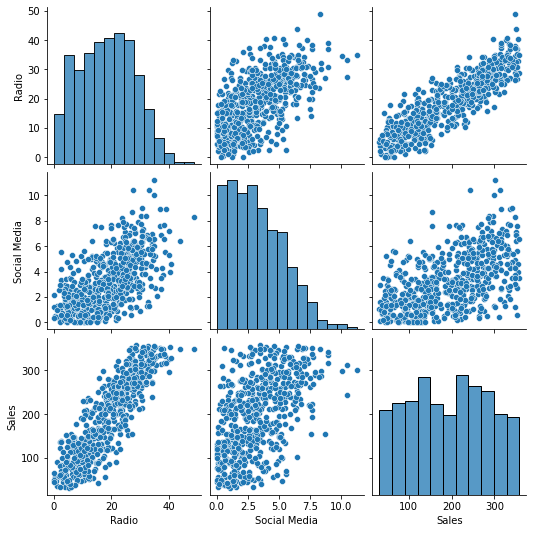

In [10]:
# Create a pairplot to show relationships among columns
sns.pairplot(df)

Radio promotional budget and Sales have the strongest linear relationship.

## **Model building** 

In [11]:
# Select relevant columns for OLS calculations
ols_df = df[['Radio', 'Sales']]

In [12]:
ols_df.head(10)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


In [13]:
# Save the linear regression formula in a new variable
ols_formula = 'Sales ~ Radio'

In [14]:
# Implement Ordinary Least Squares.
OLS = ols(formula = ols_formula, data = ols_df)
#fit the model
model = OLS.fit()
model_results = model.summary()
#display model summary
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Sun, 28 May 2023   Prob (F-statistic):          2.07e-176
Time:                        23:36:11   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Evaluate Model & Results** 

## Test for Linearity

Text(0.5, 1.0, 'Best Fit Line Linearity Test')

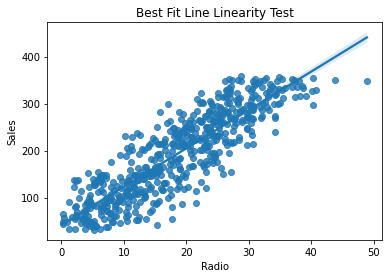

In [15]:
# Test best fit regression line for linearity
sns.regplot(x = 'Radio', y = 'Sales', data = ols_df)
plt.title('Best Fit Line Linearity Test')

## **Test for Normal Distribution**

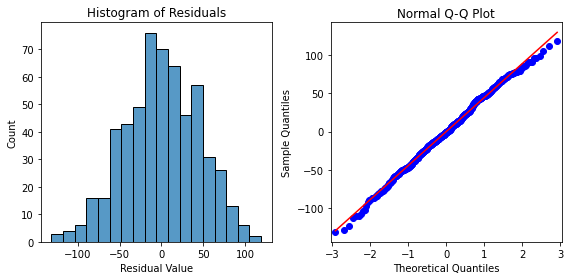

In [16]:
# Visualize the distribution of the residuals on 2 plots: Histogram, and Q-Q plot.

# Calculate the residuals and fitted values
x = ols_df['Radio']
fitted_values = model.predict(x)
residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals. 
sns.histplot(residuals, ax = axes[0])
# Set titles
axes[0].set_xlabel('Residual Value')
axes[0].set_title('Histogram of Residuals')


# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line = 's', ax = axes[1])
axes[1].set_title('Normal Q-Q Plot')
# use tight_layout
plt.tight_layout()
# Show the plot.
plt.show()

## Test for Homoscedasticity

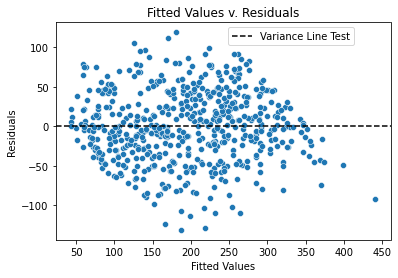

In [17]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = fitted_values, y = residuals)
# Set titles
fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')
fig.set_title('Fitted Values v. Residuals')
# Add a line at y = 0 to visualize the variance of residuals above and below 0.
plt.axhline(y = 0, color = 'black', linestyle = '--', label = 'Variance Line Test')
#legend
plt.legend(bbox_to_anchor = (0.5,1))
# Show the plot.
plt.show()

In [18]:
#re-print model summary
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Sun, 28 May 2023   Prob (F-statistic):          2.07e-176
Time:                        23:36:11   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Considerations & Results**

This is a fictional dataset <br>
More context could help us account for the remainder of the R-squared value. <br>

Confidence Interval: [7.791, 8.555]
<br>Confidence Level:    95%
<br>p-value:             0.000
<br>R-squared value:     .757
<br>slope:               8.1733